In [ ]:
!pip install geopandas shapely fiona pyproj rtree


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 28.0 MB/s eta 0:00:00


In [ ]:
from google.colab import files

uploaded = files.upload()  # 여러 파일 업로드 가능


Saving TB_FFAS_FF_OCCRR_27.cpg to TB_FFAS_FF_OCCRR_27.cpg
Saving TB_FFAS_FF_OCCRR_27.dbf to TB_FFAS_FF_OCCRR_27.dbf
Saving TB_FFAS_FF_OCCRR_27.prj to TB_FFAS_FF_OCCRR_27.prj
Saving TB_FFAS_FF_OCCRR_27.shp to TB_FFAS_FF_OCCRR_27.shp
Saving TB_FFAS_FF_OCCRR_27.shx to TB_FFAS_FF_OCCRR_27.shx


In [ ]:
import geopandas as gpd

# 업로드한 SHP 파일의 이름만 지정
gdf = gpd.read_file("TB_FFAS_FF_OCCRR_27.shp")

# 데이터 확인
print(gdf.head())


      OCCRR_DTM OCUR_DYWK    EXTING_DTM RQRMN_TM ARA_NM CTPRV_NM SGNG_NM  \
0  201311241725         일  201311241820     0055     대구       대구     달성군   
1  201305051142         일  201305051450     0308     대구       대구     달서구   
2  199103171325         일  199103171505     0140     대구       대구       동   
3  199110241910         목  199110242050     0140     대구       대구       동   
4  199111040700         월  199111041030     0330     대구       대구      달성   

  EMNDN_NM OCCCRR_RI ARA_LTNMB CUSE_NM DMG_AREA DMG_MONEY              TM_X  \
0      논공읍       노이리      산199   입산자실화     None      None  1086994.65523035   
1      상인동      None       산32   입산자실화     None      None  1096992.45908401   
2       각산      None       산64   입산자실화      1.2        40   1109523.7501264   
3       지묘      None        산1   입산자실화     0.15        10  1103141.88353207   
4       가창         오       산39   입산자실화        1        75  1100128.71586852   

               TM_Y                         geometry  
0  1750554.20

In [ ]:
# 현재 CRS 확인
print(gdf.crs)

# CRS 변환 (예: EPSG:4326 - WGS84)
gdf = gdf.to_crs(epsg=4326)

# 변환 후 확인
print(gdf.crs)


EPSG:5179
EPSG:4326


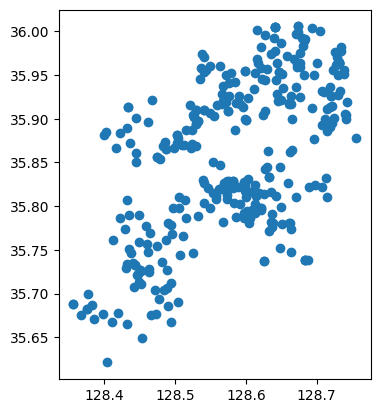

In [ ]:
import matplotlib.pyplot as plt

# 지도 시각화
gdf.plot()
plt.show()


In [ ]:
# Geometry 데이터에서 위도와 경도 추출
gdf['longitude'] = gdf.geometry.x
gdf['latitude'] = gdf.geometry.y

# geometry 컬럼 제거 후 데이터프레임 업데이트
csv_data = gdf.drop(columns='geometry')

# CSV로 저장
csv_data.to_csv("output_with_latlon.csv", index=False, encoding='cp949')

# Colab에서 CSV 파일 다운로드
from google.colab import files
files.download("output_with_latlon.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>